In [4]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
disney_df = pd.read_csv("Resources/disney.csv")
disney_df = disney_df.set_index('Title')
disney_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Lab Rats,2012,7+,6.6,NaN
America's Funniest Home Videos,1989,7+,6.2,NaN
Brain Games,2011,7+,8.3,NaN
Jessie,2011,all,5.9,NaN
PJ Masks,2015,all,5.6,NaN


In [6]:
imdb_average = disney_df['IMDB'].mean()
imdb_average

6.923668639053257

In [7]:
disney_df_dropped = disney_df.dropna()
disney_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
The Simpsons,1989,7+,8.7,85%
Gravity Falls,2012,7+,8.9,100%
Marvel's Runaways,2017,16+,7.0,87%
The Mandalorian,2019,7+,8.7,93%
Star Wars: The Clone Wars,2008,7+,8.2,93%


In [8]:
disney_df_dropped['RT'] = disney_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)
disney_df_dropped.head()

<ipython-input-8-82baae958f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_df_dropped['RT'] = disney_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
The Simpsons,1989,7+,8.7,85%,85
Gravity Falls,2012,7+,8.9,100%,100
Marvel's Runaways,2017,16+,7.0,87%,87
The Mandalorian,2019,7+,8.7,93%,93
Star Wars: The Clone Wars,2008,7+,8.2,93%,93


In [9]:
rotten_average = disney_df_dropped['RT'].mean()
age_group = disney_df['Age'].mode()
total_shows = len(disney_df)
title = disney_df.index.to_list()

In [10]:
disney_df.sort_values(by=['IMDB'], inplace=True, ascending=False)
highest_rated_imdb = disney_df.index[0]

In [11]:
disney_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)
disney_df_dropped.head(100)
highest_rated_rt = disney_df_dropped.index[0]
highest_rated_rt

<ipython-input-11-bd35795a0d6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


'The Imagineering Story'

In [12]:
disney = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rotten_average})
disney

,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,180,all,The Imagineering Story,6.923669,The Imagineering Story,81.173913


In [14]:
disney_df = disney_df.reset_index()
bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]
groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
pd.cut(disney_df['Year'], bins, labels=groups)

0      2010-2020
1      2010-2020
2      2010-2020
3      1980-1989
4      2010-2020
         ...    
175    2010-2020
176    2010-2020
177    2010-2020
178    2010-2020
179    2010-2020
Name: Year, Length: 180, dtype: category
Categories (6, object): [1900-1949 < 1950-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010-2020]

In [15]:
disney_df['Age Range'] = pd.cut(disney_df['Year'], bins, labels=groups)
disney_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,The Imagineering Story,2019,7+,9.1,100%,2010-2020
1,Gravity Falls,2012,7+,8.9,100%,2010-2020
2,One Strange Rock,2018,all,8.8,83%,2010-2020
3,The Simpsons,1989,7+,8.7,85%,1980-1989
4,The Mandalorian,2019,7+,8.7,93%,2010-2020


In [16]:
age_range_df = disney_df.groupby("Age Range")
age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,The Imagineering Story,2019,7+,9.1,100%,2010-2020
1,Gravity Falls,2012,7+,8.9,100%,2010-2020
2,One Strange Rock,2018,all,8.8,83%,2010-2020
3,The Simpsons,1989,7+,8.7,85%,1980-1989
4,The Mandalorian,2019,7+,8.7,93%,2010-2020
...,...,...,...,...,...,...
147,Spider-Woman,1979,all,5.7,NaN,1950-1979
150,Handy Manny,2006,all,5.5,NaN,2000-2009
152,The Avengers: United They Stand,1999,7+,5.5,NaN,1990-1999
160,Hannah Montana,2006,all,5.0,NaN,2000-2009


In [17]:
ranges = age_range_df["Age Range"].count()
ranges

Age Range
1900-1949      0
1950-1979      2
1980-1989      7
1990-1999     22
2000-2009     30
2010-2020    119
Name: Age Range, dtype: int64

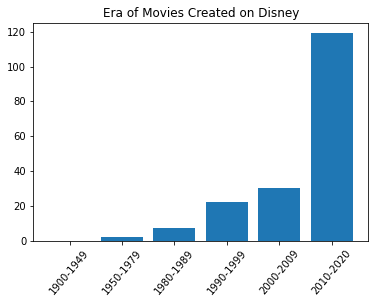

In [18]:
plt.bar(groups, ranges);
plt.title('Era of Movies Created on Disney');
plt.xticks(rotation=50);